In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images=train_images/255.0
test_images=test_images/255.0




4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images.shape,train_labels.shape,test_images.shape,test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

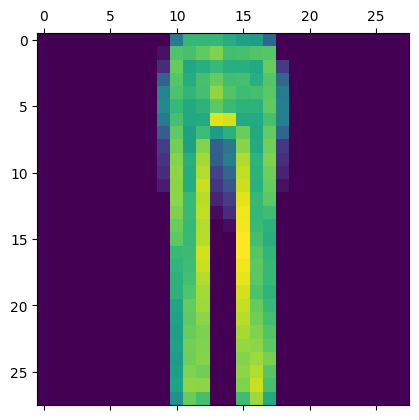

In [ ]:
plt.matshow(train_images[69])

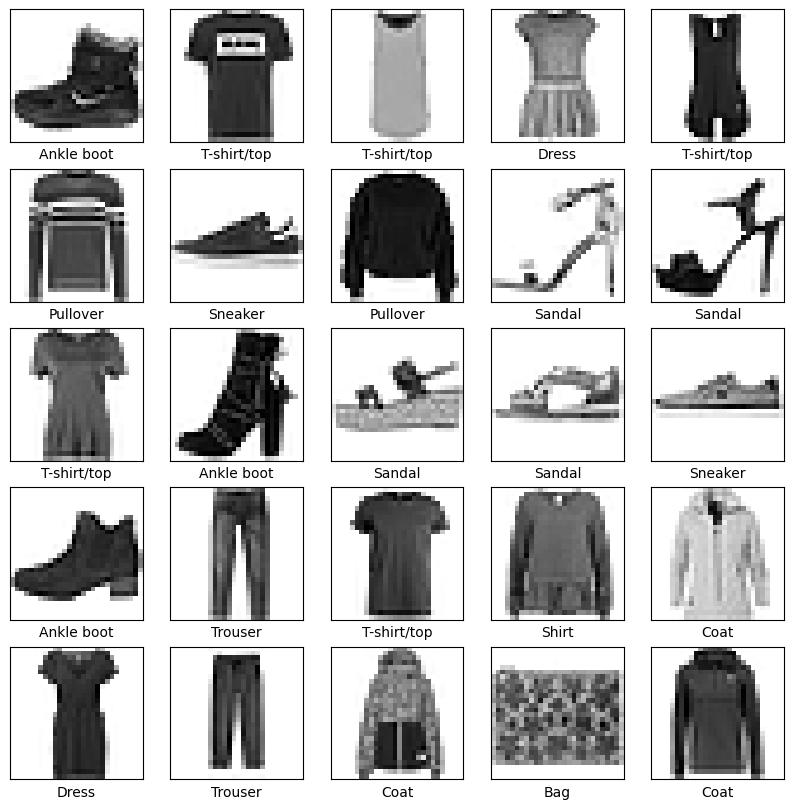

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag','Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers import BatchNormalization
model=keras.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.MaxPooling2D((2,2)))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_3 (Bat  (None, 26, 26, 32)        128       
 chNormalization)                                                
                                                                 
 dropout_3 (Dropout)         (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_4 (Bat  (None, 11, 11, 64)       

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_3 (Bat  (None, 26, 26, 32)        128       
 chNormalization)                                                
                                                                 
 dropout_3 (Dropout)         (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_4 (Bat  (None, 11, 11, 64)       

In [ ]:

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

myCNN = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 116s 61ms/step - loss: 0.5893 - accuracy: 0.7857 - val_loss: 0.4323 - val_accuracy: 0.8414
Epoch 2/10
1875/1875 [==============================] - 104s 56ms/step - loss: 0.4223 - accuracy: 0.8459 - val_loss: 0.3833 - val_accuracy: 0.8583
Epoch 3/10
1875/1875 [==============================] - 102s 55ms/step - loss: 0.3777 - accuracy: 0.8617 - val_loss: 0.4064 - val_accuracy: 0.8378
Epoch 4/10
1875/1875 [==============================] - 104s 56ms/step - loss: 0.3481 - accuracy: 0.8724 - val_loss: 0.4070 - val_accuracy: 0.8524
Epoch 5/10
1875/1875 [==============================] - 104s 55ms/step - loss: 0.3322 - accuracy: 0.8792 - val_loss: 0.3359 - val_accuracy: 0.8739
Epoch 6/10
1875/1875 [==============================] - 106s 56ms/step - loss: 0.3149 - accuracy: 0.8852 - val_loss: 0.3635 - val_accuracy: 0.8643
Epoch 7/10
1875/1875 [==============================] - 103s 55ms/step - loss: 0.3078 - accuracy: 0.8859 - val_loss: 0

In [ ]:
type(myCNN)

keras.src.callbacks.History

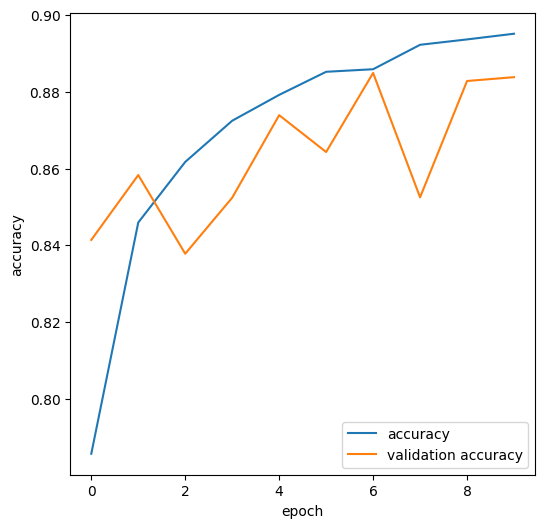

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(myCNN.history['accuracy'],label='accuracy')
plt.plot(myCNN.history['val_accuracy'],label='validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right')

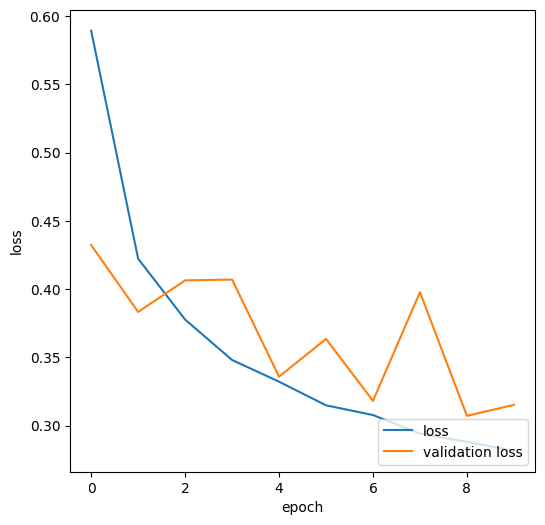

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(myCNN.history['loss'],label='loss')
plt.plot(myCNN.history['val_loss'],label='validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')

In [ ]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
print(test_acc)

313/313 [==============================] - 5s 15ms/step - loss: 0.3152 - accuracy: 0.8838
0.8838000297546387


In [ ]:
predictions=model.predict(test_images)

313/313 [==============================] - 4s 12ms/step
